In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.2.0


## data loading

In [2]:
data_path = "./data/TCIR-ALL_2017.h5"
data_info = pd.read_hdf(data_path, key="info", mode='r')
# with h5py.File(data_path, 'r') as hf:
#     data_matrix = hf['matrix'][:]

In [3]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0


In [10]:
data_path_1 = "~/Downloads/TCIR-ATLN_EPAC_WPAC.h5"
data_info_1 = pd.read_hdf(data_path_1, key="info", mode='r')

In [11]:
data_info_1.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,200301L,-66.2,29.1,2003041800,30.0,0.0,1008.0
1,ATLN,200301L,-66.1,29.5,2003041803,30.0,0.0,1008.0
2,ATLN,200301L,-66.0,29.9,2003041806,30.0,0.0,1008.0
3,ATLN,200301L,-65.9,30.4,2003041809,30.0,0.0,1008.0
4,ATLN,200301L,-65.8,30.8,2003041812,30.0,0.0,1008.0


In [12]:
data_path_2 = "~/Downloads/TCIR-CPAC_IO_SH.h5"
data_info_2 = pd.read_hdf(data_path_2, key="info", mode='r')

In [13]:
data_info_2.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,CPAC,200301C,223.5,12.5,2003081100,25.0,0.0,1009.0
1,CPAC,200301C,222.3,12.4,2003081103,25.0,0.0,1009.0
2,CPAC,200301C,221.2,12.4,2003081106,25.0,0.0,1009.0
3,CPAC,200301C,220.2,12.4,2003081109,25.0,0.0,1009.0
4,CPAC,200301C,219.2,12.3,2003081112,25.0,0.0,1009.0


In [14]:
print(len(data_info), len(data_info_1), len(data_info_2))

4580 47381 23118


Is there missing value?

In [15]:
data_info.isna().sum(axis=0)

data_set     0
ID           0
lon          0
lat          0
time         0
Vmax         0
R35_4qAVG    0
MSLP         0
dtype: int64

In [16]:
data_info_1.isna().sum(axis=0)

data_set     0
ID           0
lon          0
lat          0
time         0
Vmax         0
R35_4qAVG    0
MSLP         0
dtype: int64

In [17]:
data_info_2.isna().sum(axis=0)

data_set     0
ID           0
lon          0
lat          0
time         0
Vmax         0
R35_4qAVG    0
MSLP         0
dtype: int64

In [18]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 0 to 4579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data_set   4580 non-null   object 
 1   ID         4580 non-null   object 
 2   lon        4580 non-null   float64
 3   lat        4580 non-null   float64
 4   time       4580 non-null   object 
 5   Vmax       4580 non-null   float64
 6   R35_4qAVG  4580 non-null   float64
 7   MSLP       4580 non-null   float64
dtypes: float64(5), object(3)
memory usage: 482.0+ KB


In [19]:
data_info.data_set.unique()

array(['ATLN', 'EPAC', 'IO', 'SH', 'WPAC'], dtype=object)

In [20]:
data_info_1.data_set.unique()

array(['ATLN', 'EPAC', 'WPAC'], dtype=object)

In [21]:
data_info_2.data_set.unique()

array(['CPAC', 'IO', 'SH'], dtype=object)

In [23]:
data_info.groupby('ID').count().head()

,data_set,lon,lat,time,Vmax,R35_4qAVG,MSLP
ID,,,,,,,
201701E,21,21,21,21,21,21,21
201701I,23,23,23,23,23,23,23
201701L,53,53,53,53,53,53,53
201701S,47,47,47,47,47,47,47
201701W,67,67,67,67,67,67,67


In [24]:
data_info_1.groupby('ID').count().head()

,data_set,lon,lat,time,Vmax,R35_4qAVG,MSLP
ID,,,,,,,
200301E,55,55,55,55,55,55,55
200301L,77,77,77,77,77,77,77
200301W,81,81,81,81,81,81,81
200302E,61,61,61,61,61,61,61
200302L,7,7,7,7,7,7,7


In [25]:
data_info_2.groupby('ID').count().head()

,data_set,lon,lat,time,Vmax,R35_4qAVG,MSLP
ID,,,,,,,
200301C,49,49,49,49,49,49,49
200301I,89,89,89,89,89,89,89
200302I,61,61,61,61,61,61,61
200303I,39,39,39,39,39,39,39
200311S,91,91,91,91,91,91,91


In [27]:
data_info_2.iloc[-1]

data_set             SH
ID              201620S
lon               190.7
lat               -13.5
time         2016042406
Vmax                 30
R35_4qAVG             0
MSLP               1000
Name: 23117, dtype: object

In [28]:
data_info_1.iloc[-1]

data_set           WPAC
ID              201630W
lon               112.3
lat                11.9
time         2016122806
Vmax                 20
R35_4qAVG             0
MSLP               1007
Name: 47380, dtype: object

In [29]:
data_info = data_info.assign(time=pd.to_datetime(data_info.time, format=r'%Y%m%d%H'))

In [30]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017-04-16 06:00:00,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017-04-16 09:00:00,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017-04-16 12:00:00,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017-04-16 15:00:00,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017-04-16 18:00:00,55.0,255.0,986.0


Is it true that for every ID the increase in time is 3 hours?

In [44]:
data_info[['ID', 'time']].groupby('ID').diff().nunique()

time    1
dtype: int64

In [39]:
data_info_1 = data_info.assign(time=pd.to_datetime(data_info_1.time, format=r'%Y%m%d%H'))
data_info_2 = data_info.assign(time=pd.to_datetime(data_info_2.time, format=r'%Y%m%d%H'))

In [43]:
data_info_1[['ID', 'time']].groupby('ID').diff().nunique()

time    54
dtype: int64

In [45]:
data_info_2[['ID', 'time']].groupby('ID').diff().nunique()

time    85
dtype: int64

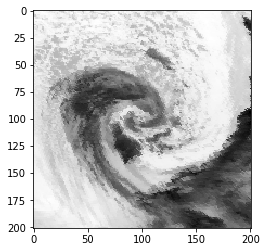

In [4]:
img = data_matrix[4,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img, plt.cm.gray)

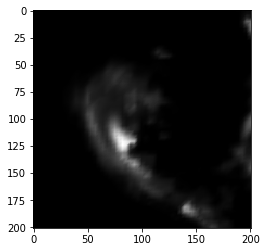

In [5]:
img = data_matrix[4,:,:,3].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img, plt.cm.gray)

## Data preprocessing

In [6]:
## keep only IR and PMW
X_irpmw = data_matrix[:,:,:,0::3]
y = data_info['Vmax'].values[:,np.newaxis]

In [7]:
X_irpmw[np.isnan(X_irpmw)] = 0
X_irpmw[X_irpmw > 1000] = 0

In [8]:
X_tensor = tf.convert_to_tensor(X_irpmw)
y = tf.convert_to_tensor(y)

### Standardization

In [9]:
X_std = tf.image.per_image_standardization(X_tensor)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
img = X_std[0,:,:,:]
print(np.mean(img), np.std(img))

-2.1339115e-08 1.0000001


## Preprocessing layers

In [11]:
class Preprocessing(keras.layers.Layer):
    def __init__(self):
        super(Preprocessing, self).__init__()
    def call(self, inputs, training=None):
        if training:
            inputs = tf.image.rot90(inputs, k=np.random.randint(4))
        return tf.image.central_crop(inputs, 0.5)

In [12]:
pp = Preprocessing()

In [13]:
rotated = pp(X_std[:5,:,:,:], training=True)

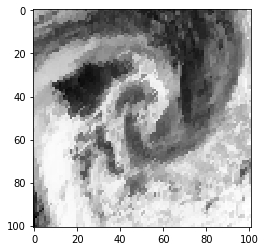

In [14]:
fig, ax = plt.subplots()
pos = ax.imshow(rotated[4,:,:,0], plt.cm.gray)

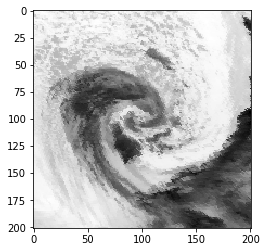

In [15]:
fig, ax = plt.subplots()
pos = ax.imshow(X_std[4,:,:,0], plt.cm.gray)

## Building a model

In [34]:
reg_param = 1e-5
model = keras.models.Sequential([
    Preprocessing(),
    keras.layers.Conv2D(filters=16, kernel_size=4, strides=2, padding='valid', activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='valid', activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='valid', activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='valid', activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
    keras.layers.Dense(1, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_param)),
])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=5e-4, beta_1=0.99, beta_2=0.9999))

In [ ]:
history = model.fit(X_std, y)

Train on 4580 samples


In [18]:
print("GPU Available: ", tf.test.is_gpu_available())

GPU Available:  False
